# Introduction
This notebook purpose is to perform EDA on processed data. Using this notebook result, we will decide on which features need to be included in training models.

### Get source folder and append to sys directory

In [1]:
from __future__ import print_function
import os
import sys
PROJ_ROOT = os.path.join(os.pardir)
print(os.path.abspath(PROJ_ROOT))
src_dir = os.path.join(PROJ_ROOT, "src")
sys.path.append(src_dir)
# Data path example
#pump_data_path = os.path.join(PROJ_ROOT,
#                              "data",
#                              "raw",
#                              "pumps_train_values.csv")

/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/runnable_program


### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import sklearn

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 1
# Use %aimport module to reload each module
%aimport data.read_data
from data import read_data

# Visualizations
import matplotlib.pyplot as plt

# Get interim data

In [3]:
# list_interim = read_data.read_data_by_type(PROJ_ROOT=PROJ_ROOT,data_type="interim")

../data/interim/16.csv


In [3]:
# OK, mình chỉ cần analysis trên site 49 thôi.
EDA_site = pd.read_csv("/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/runnable_program/data/interim/hcm_conc.csv", parse_dates=True)
EDA_site['time'] = pd.to_datetime(EDA_site['time'])
EDA_site_2021 = EDA_site.loc[EDA_site['time'] >= pd.to_datetime("2021-01-01 00:00 AM")]
EDA_day = EDA_site.set_index('time').resample('D').mean()
EDA_week = EDA_site.set_index('time').resample('W').mean()
EDA_month = EDA_site.set_index('time').resample('M').mean()
EDA_year = EDA_site.set_index('time').resample('Y').mean()

Text(0.5, 1.0, 'ACF hour for 30 days')

Text(0.5, 1.0, 'ACF days')

Text(0.5, 1.0, 'ACF weeks')

Text(0.5, 1.0, 'ACF months')

Text(0.5, 1.0, 'ACF years')

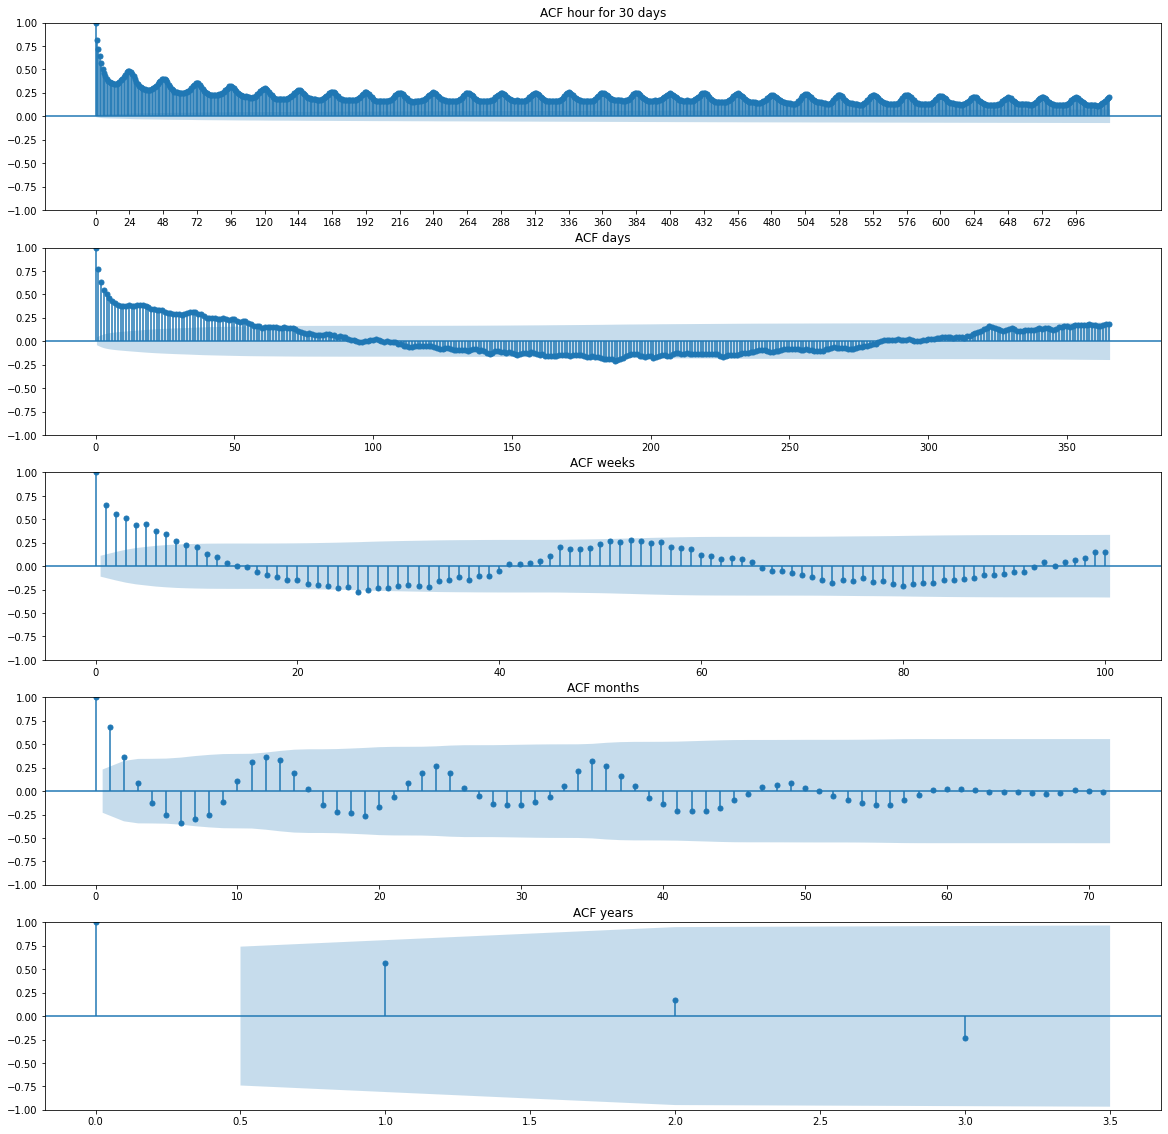

In [58]:
import statsmodels.api as sm
fig, axs = plt.subplots(5, 1, figsize=(20, 20))
_ = sm.graphics.tsa.plot_acf(EDA_site['PM25'], lags=720, ax = axs[0])
axs[0].set_xticks(ticks=range(0, 720, 24));
axs[0].set_title("ACF hour for 30 days")
_ = sm.graphics.tsa.plot_acf(EDA_day['PM25'], lags=365, ax = axs[1])
axs[1].set_title("ACF days for 365 days")
_ = sm.graphics.tsa.plot_acf(EDA_week['PM25'], lags=100, ax = axs[2])
axs[2].set_title("ACF weeks")
_ = sm.graphics.tsa.plot_acf(EDA_month['PM25'], lags=71, ax = axs[3])
axs[3].set_title("ACF months")
_ = sm.graphics.tsa.plot_acf(EDA_year['PM25'], lags=3, ax = axs[4])
axs[4].set_title("ACF years")
plt.show()

Text(0.5, 0.98, 'Hours')

Text(0.5, 0.98, 'Day')

Text(0.5, 0.98, 'Week')

Text(0.5, 0.98, 'Month')

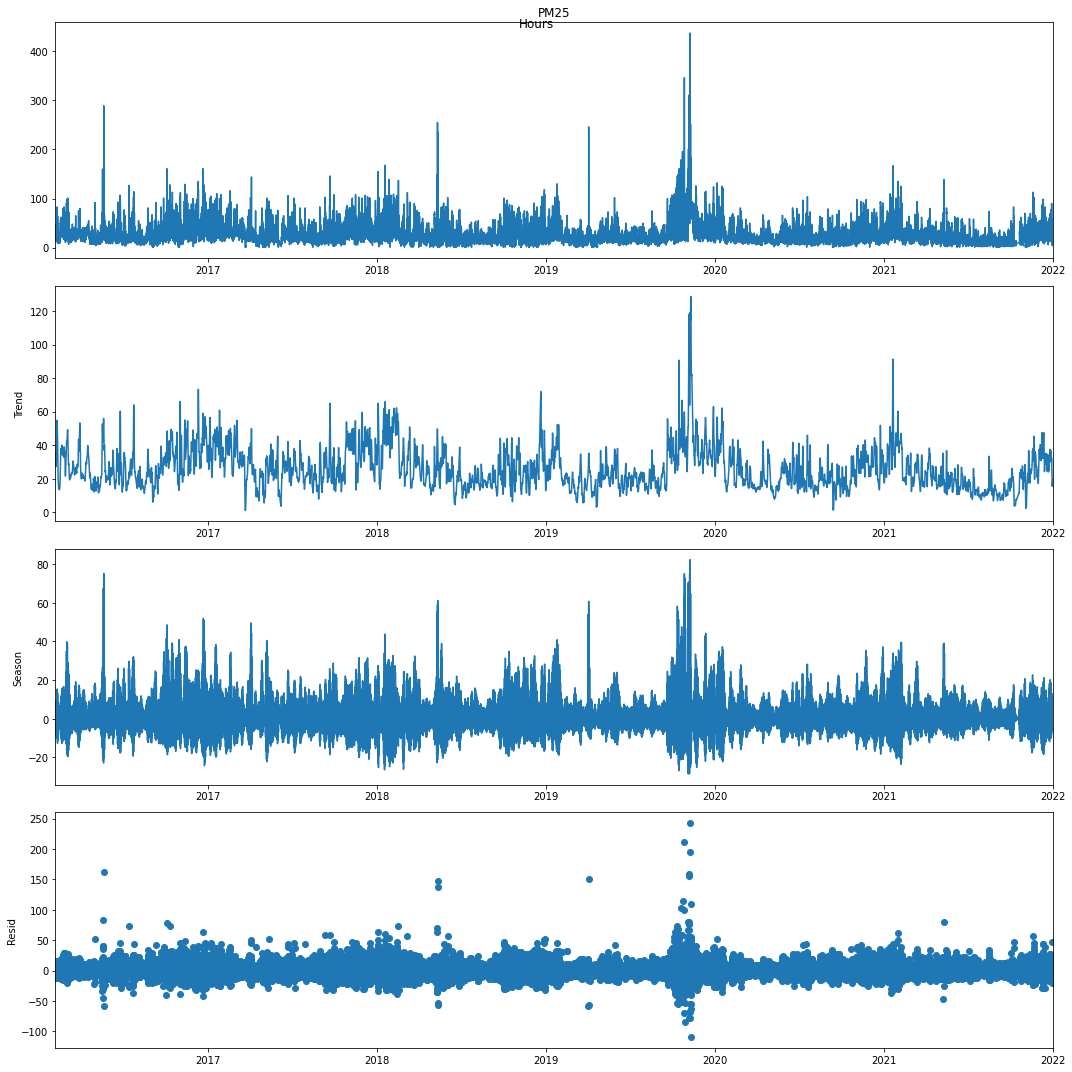

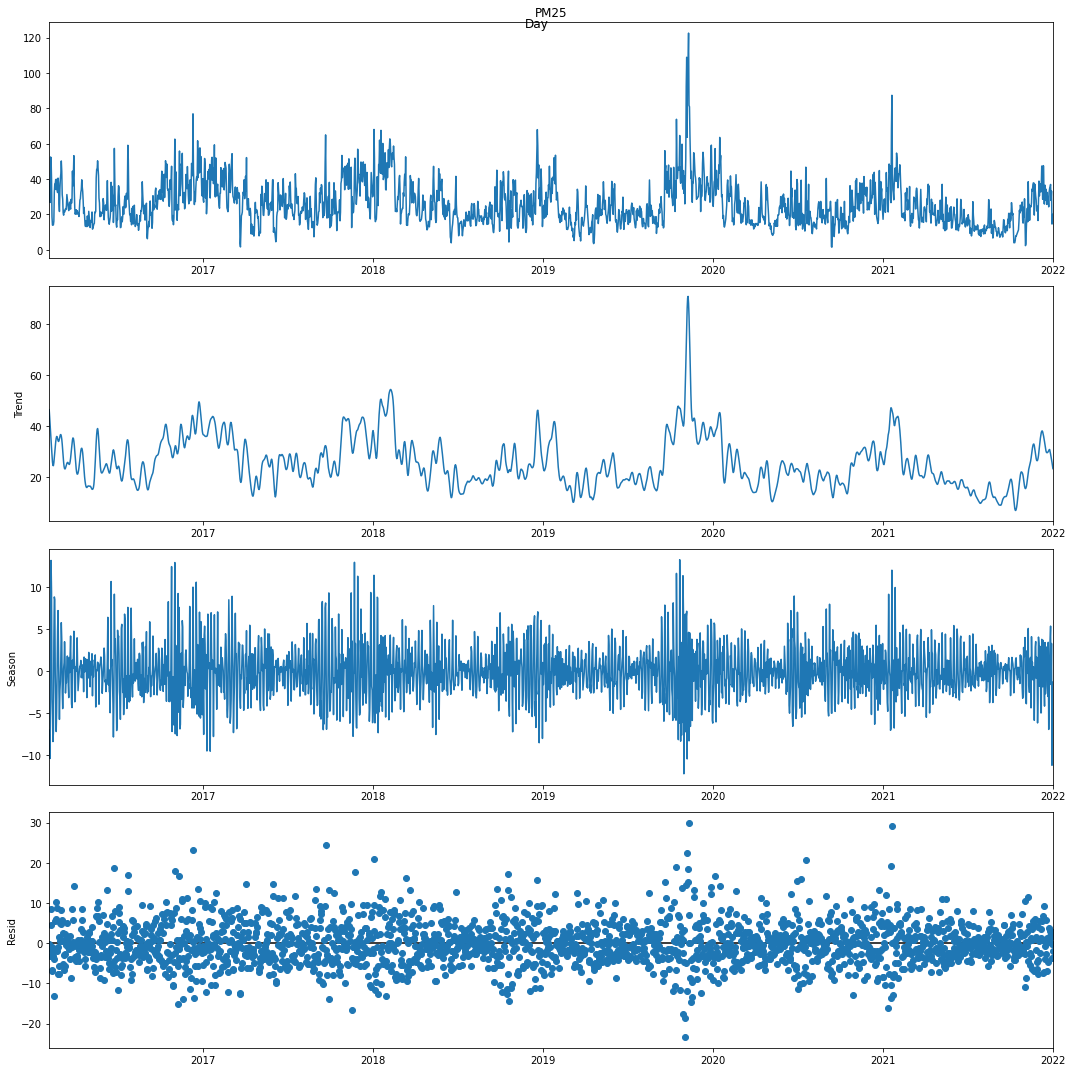

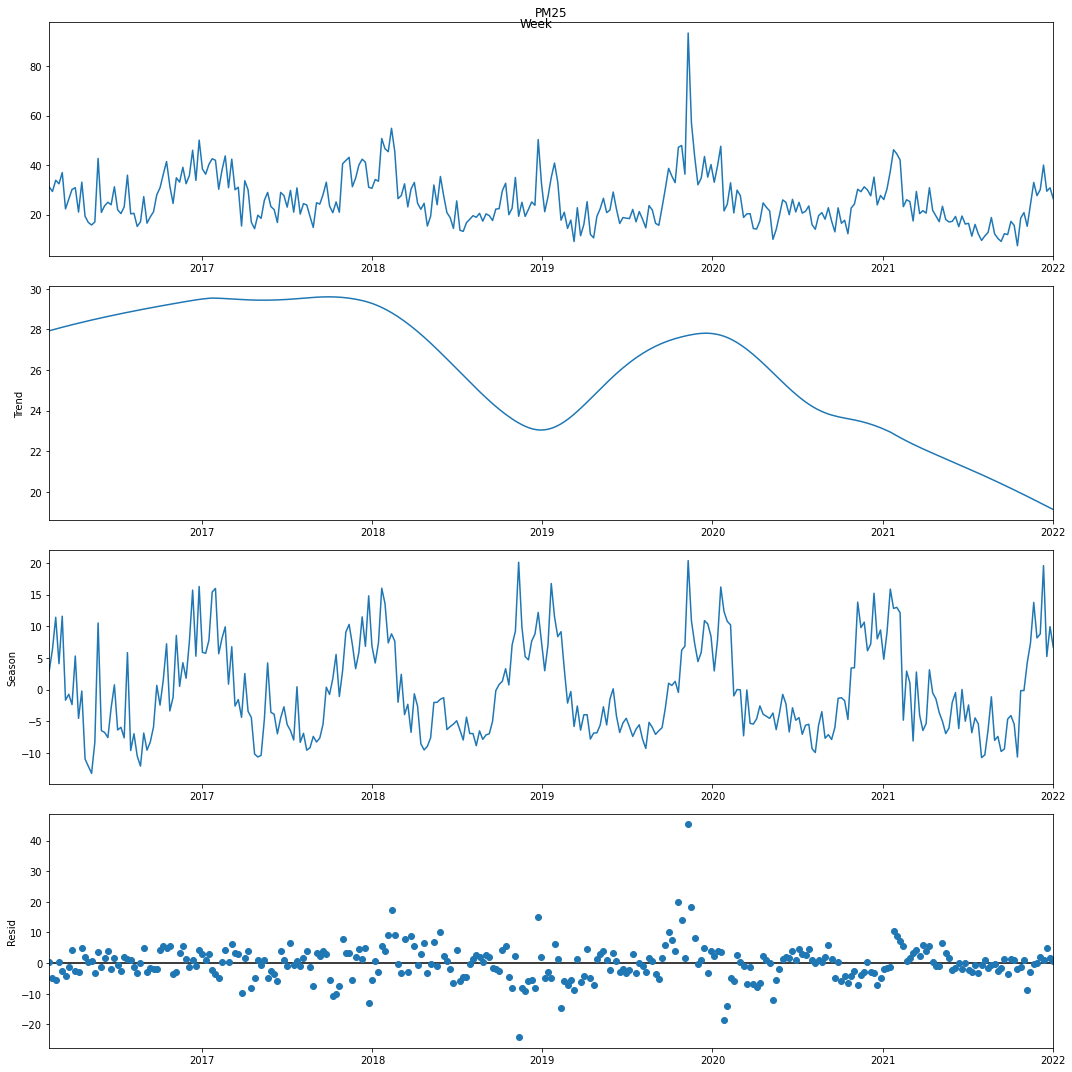

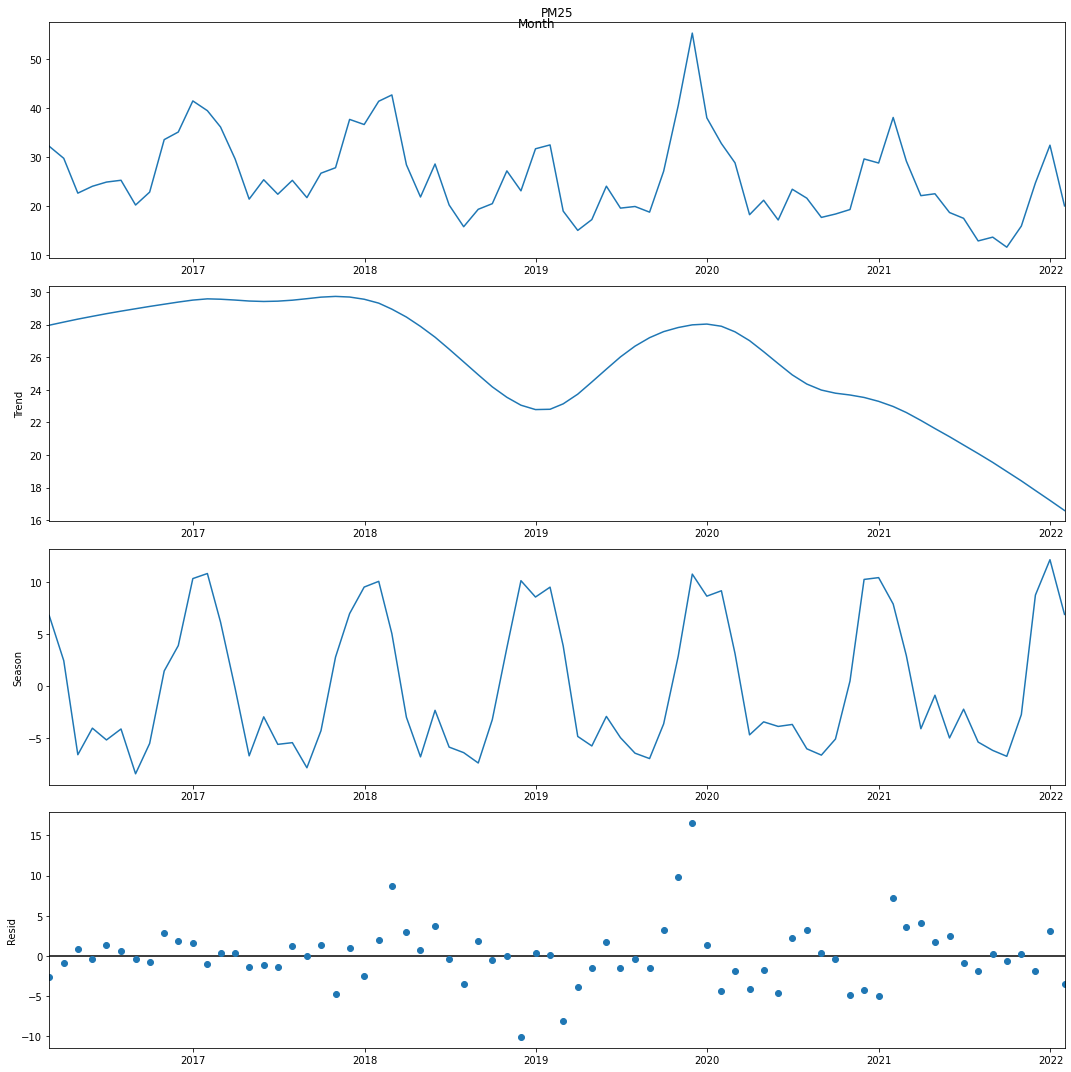

In [20]:
# Plot decomposition
from statsmodels.tsa.seasonal import STL
plt.rcParams["figure.figsize"] = (15,15)
res = STL(EDA_site.set_index('time')['PM25']).fit()
fig = res.plot()
fig.suptitle("Hours")

res_1 = STL(EDA_day['PM25'], period=24).fit()
fig_1 = res_1.plot()
fig_1.suptitle("Day")

res_2 = STL(EDA_week['PM25']).fit()
fig_2 = res_2.plot()
fig_2.suptitle("Week")

res_3 = STL(EDA_month['PM25']).fit()
fig_3 = res_3.plot()
fig_3.suptitle("Month")
# res_4 = STL(EDA_year['PM25']).fit()
# res_4.plot()

Text(0.5, 1.0, 'ACF hour')

Text(0.5, 1.0, 'ACF days')

Text(0.5, 1.0, 'ACF weeks')

Text(0.5, 1.0, 'ACF months')

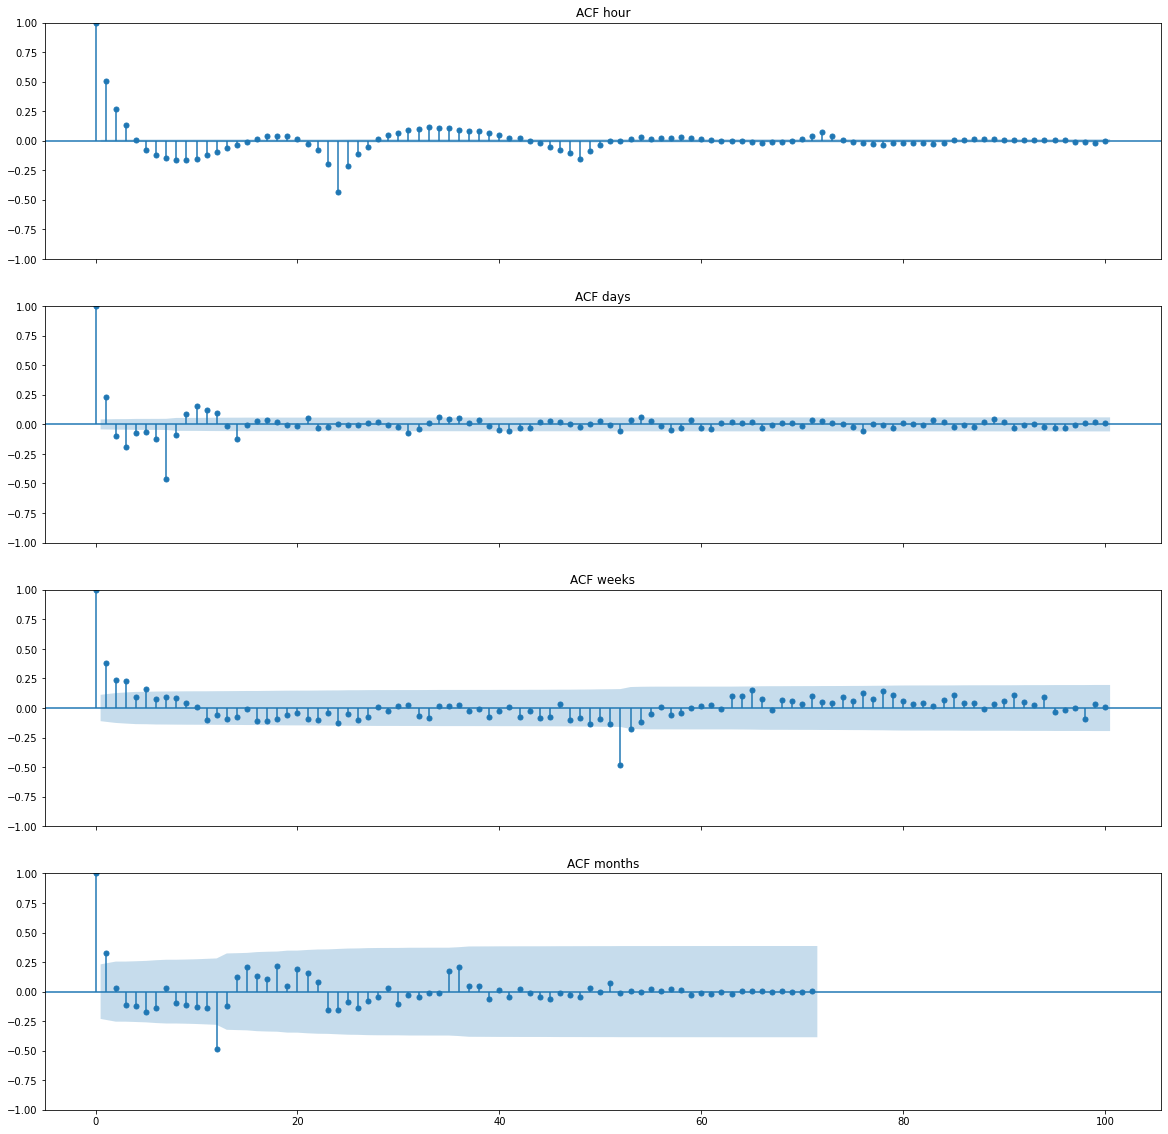

In [26]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(20, 20))
_ = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax = axs[0])
axs[0].set_title("ACF hour")
_ = sm.graphics.tsa.plot_acf(res_1.resid, lags=100, ax = axs[1])
axs[1].set_title("ACF days")
_ = sm.graphics.tsa.plot_acf(res_2.resid, lags=100, ax = axs[2])
axs[2].set_title("ACF weeks")
_ = sm.graphics.tsa.plot_acf(res_3.resid, lags=71, ax = axs[3])
axs[3].set_title("ACF months")
plt.show()

ValueError: period must be a positive integer >= 2

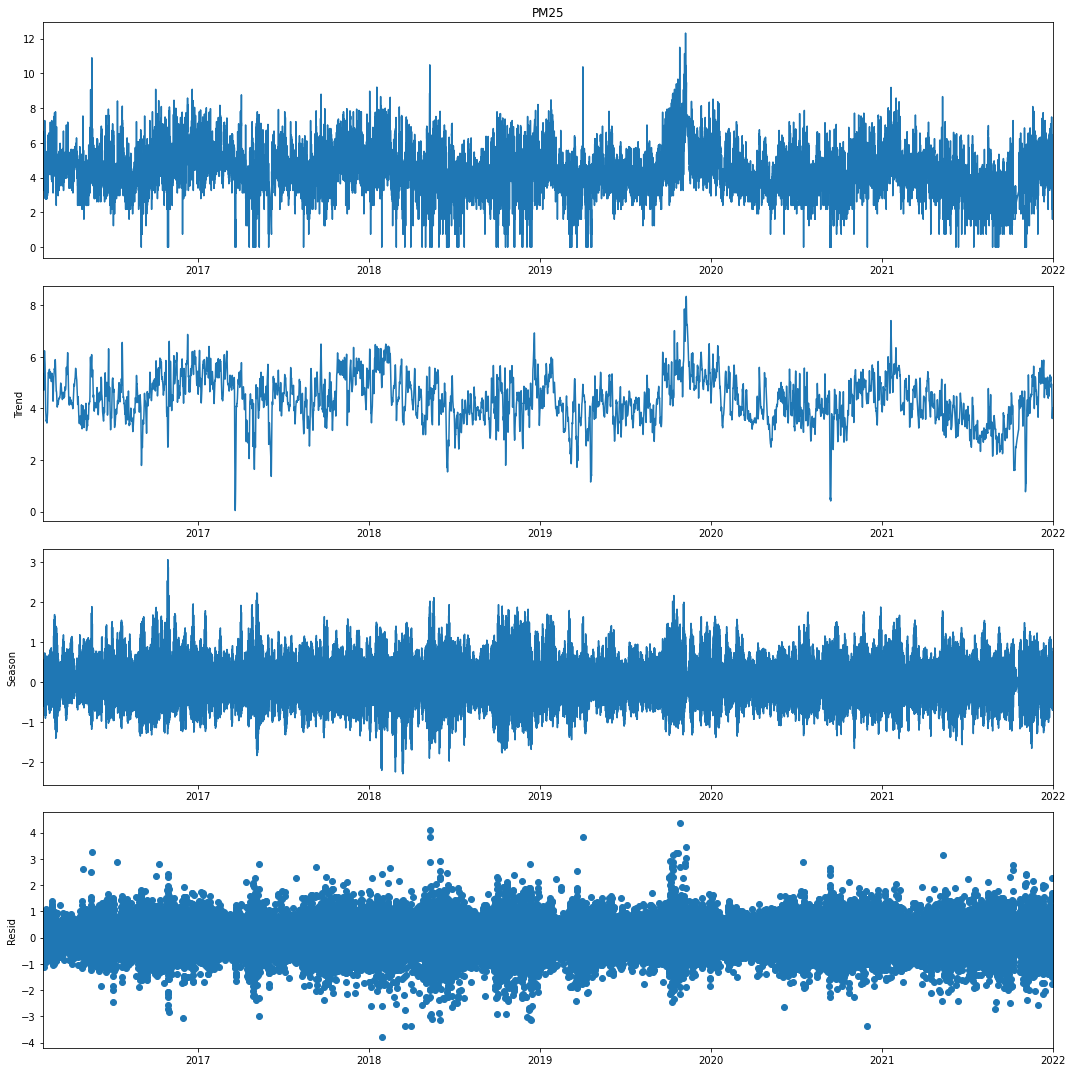

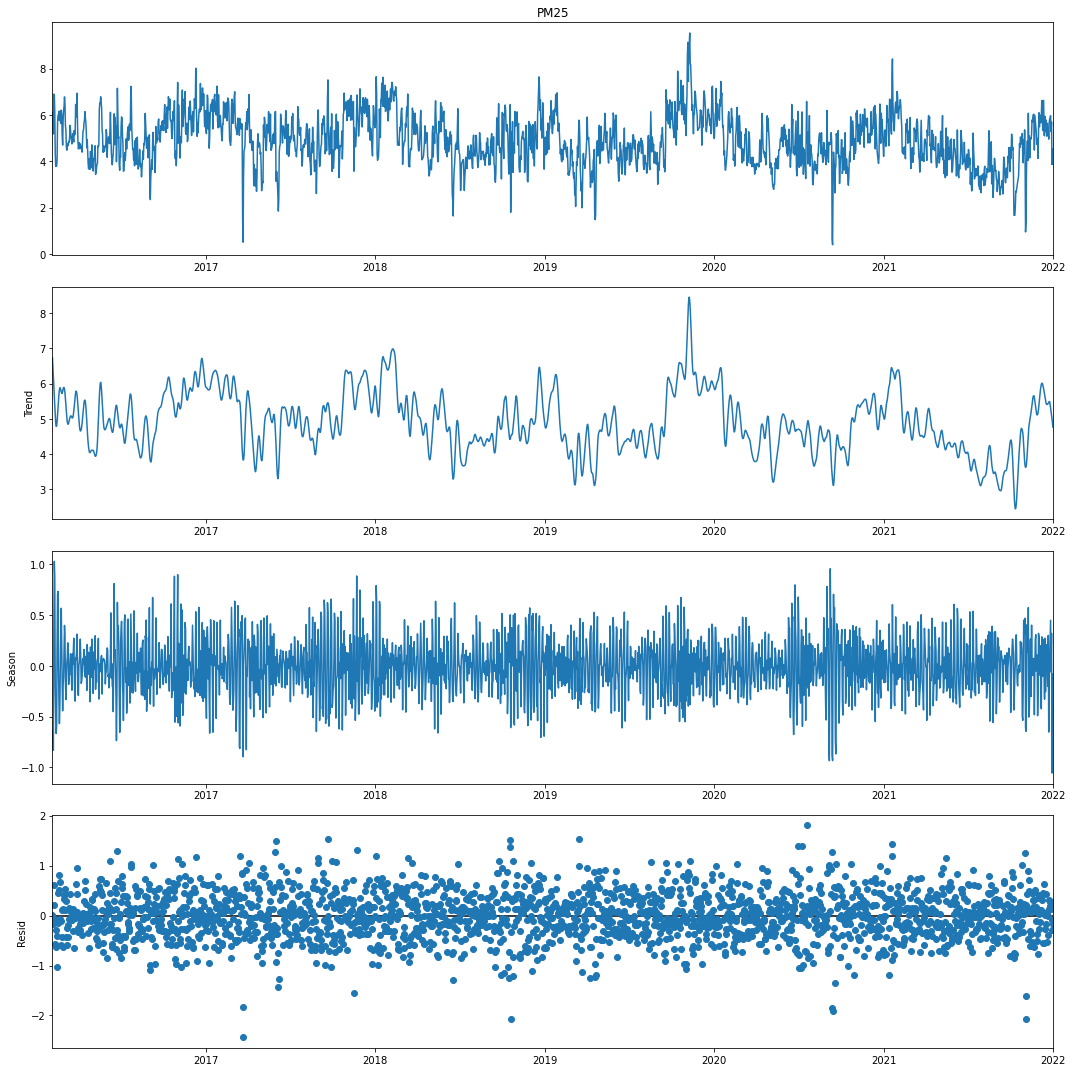

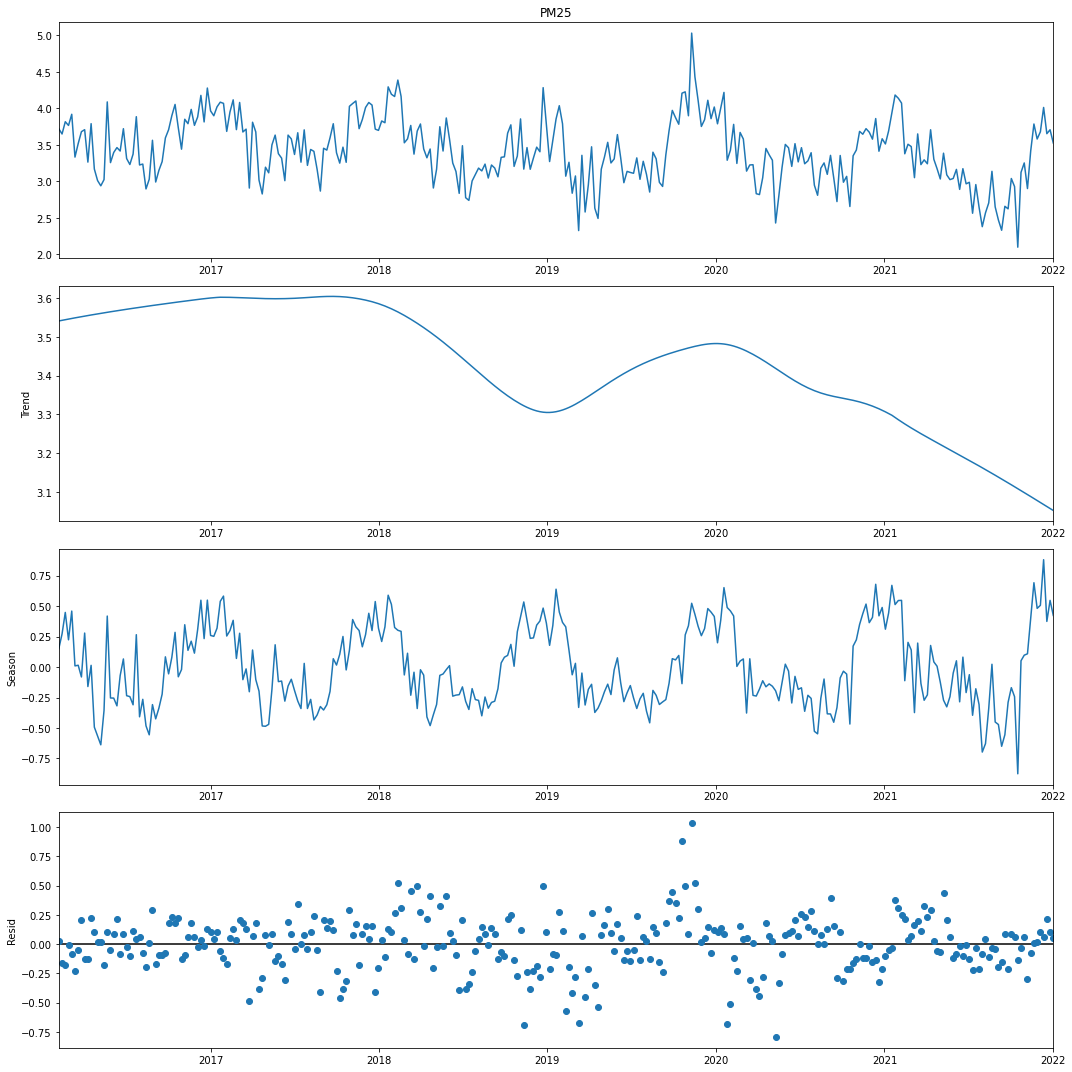

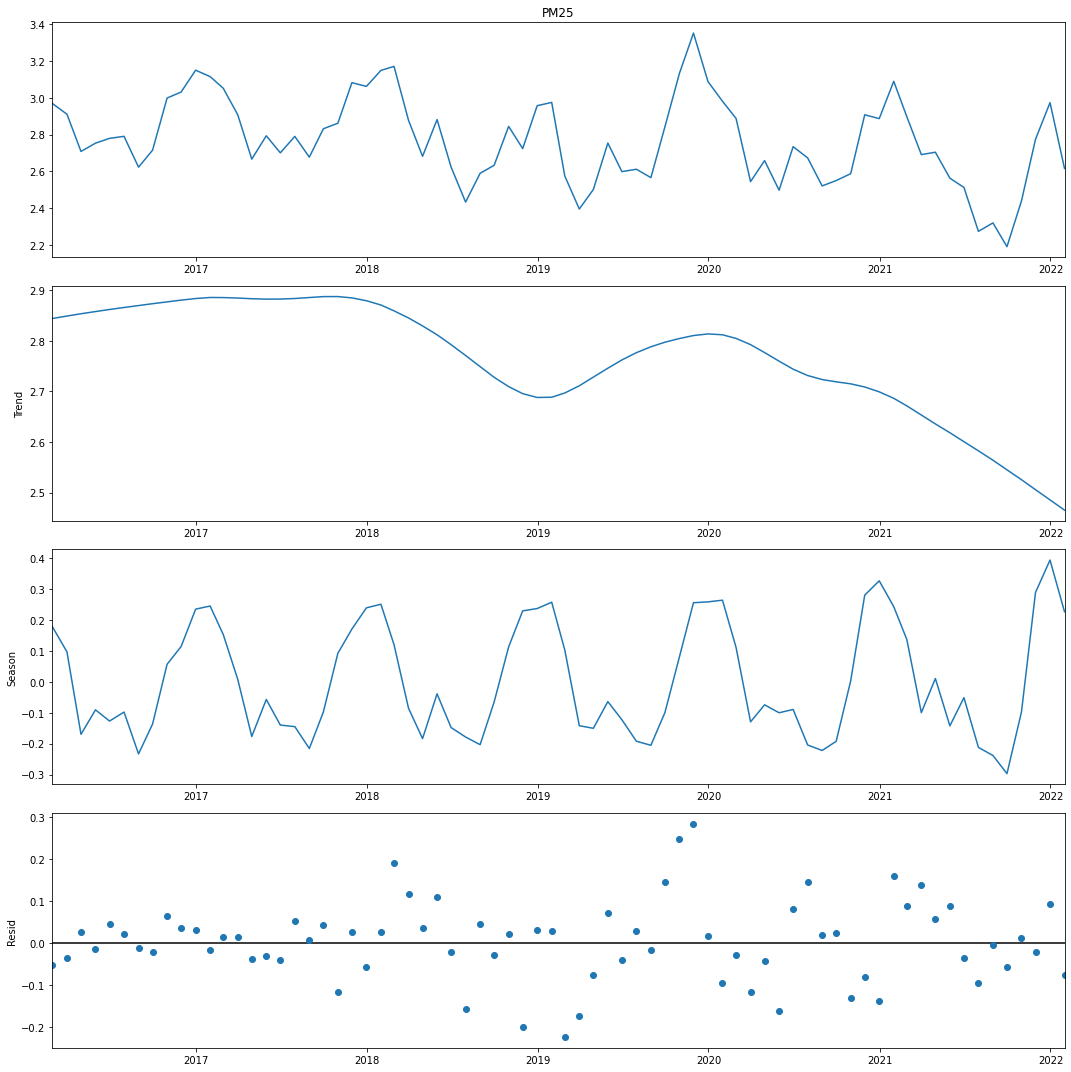

In [45]:
from scipy import stats
import seaborn as sns
def BC_data_plot(data):
    fitted_data, fitted_lambda = stats.boxcox(data['PM25'])
    data_BC = data.copy()
    data_BC.loc[:, 'PM25'] = fitted_data
    res = STL(data_BC['PM25']).fit()
    return res.plot()
def log10_data_plot(data):
    data_log = data.copy()
    data_log['PM25'] = data_log[['PM25']].applymap(lambda x: np.log10(x+1))
    res = STL(data_log['PM25']).fit()
    return res.plot()

BC_data_plot(EDA_site.set_index('time'));
BC_data_plot(EDA_day);
BC_data_plot(EDA_week);
BC_data_plot(EDA_month);
BC_data_plot(EDA_year);

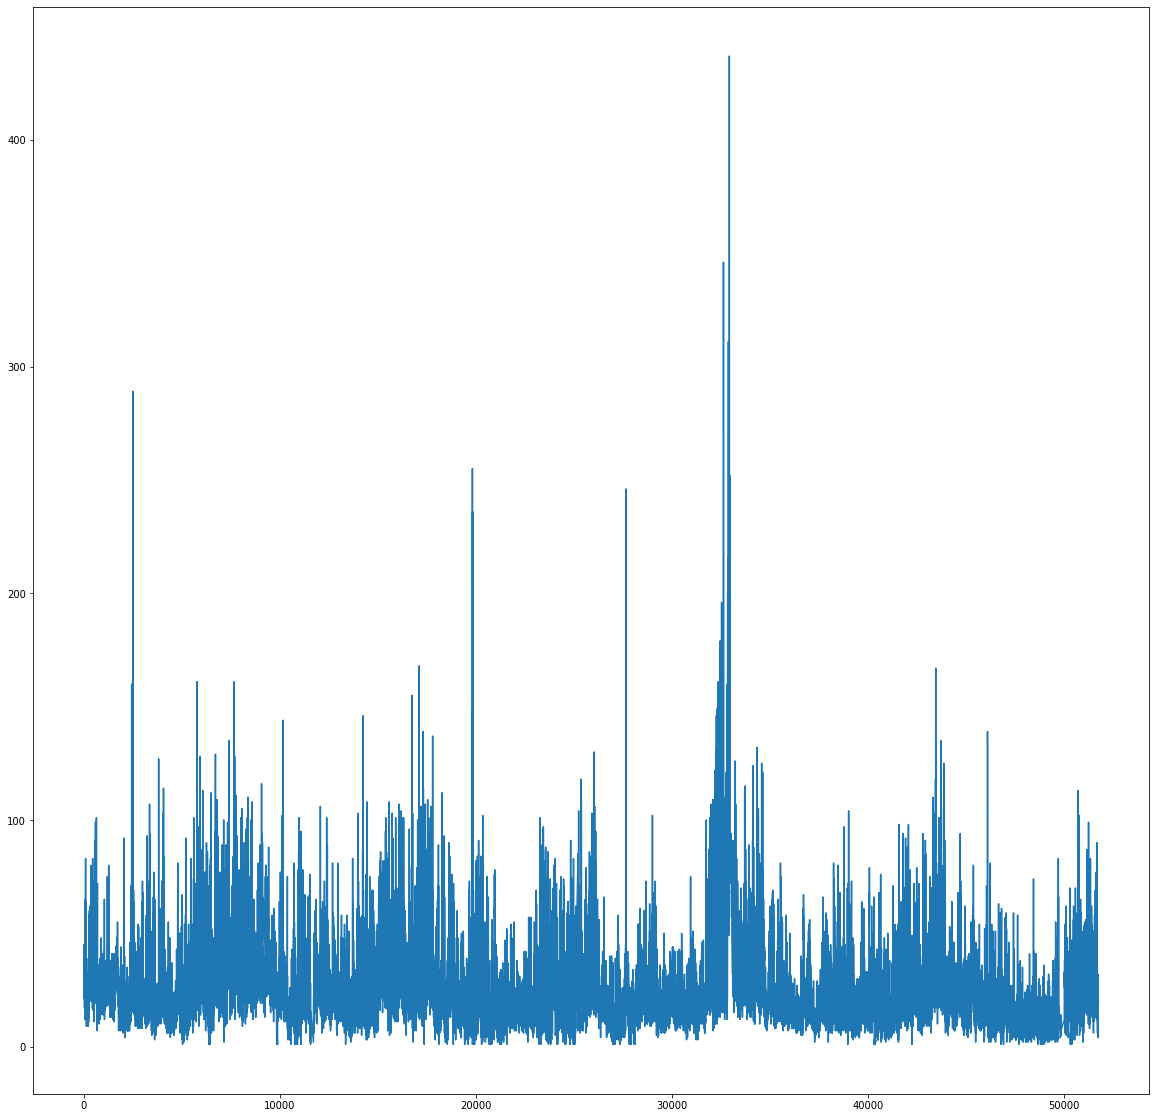

In [51]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
ax.plot(EDA_site['PM25'])

ValueError: period must be a positive integer >= 2

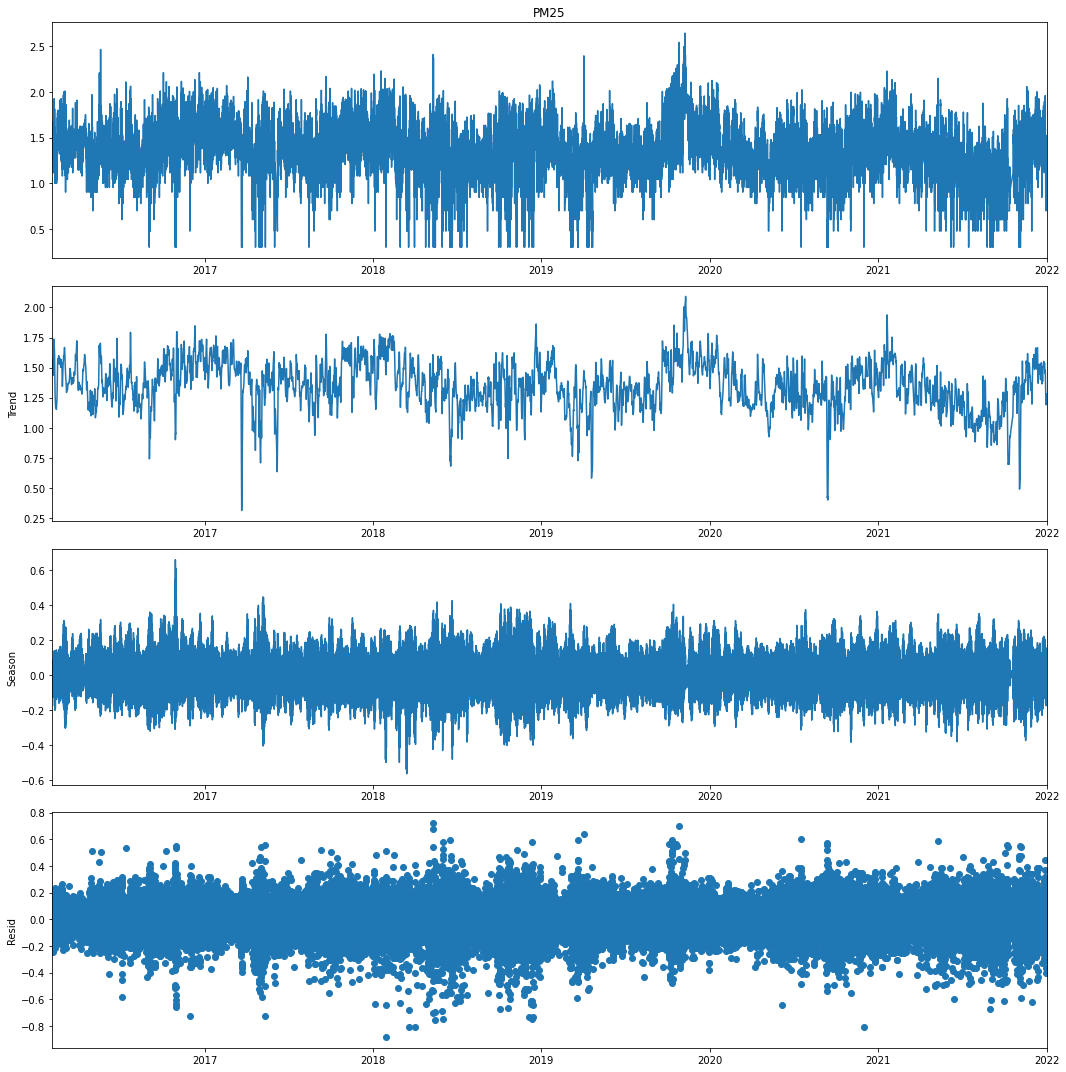

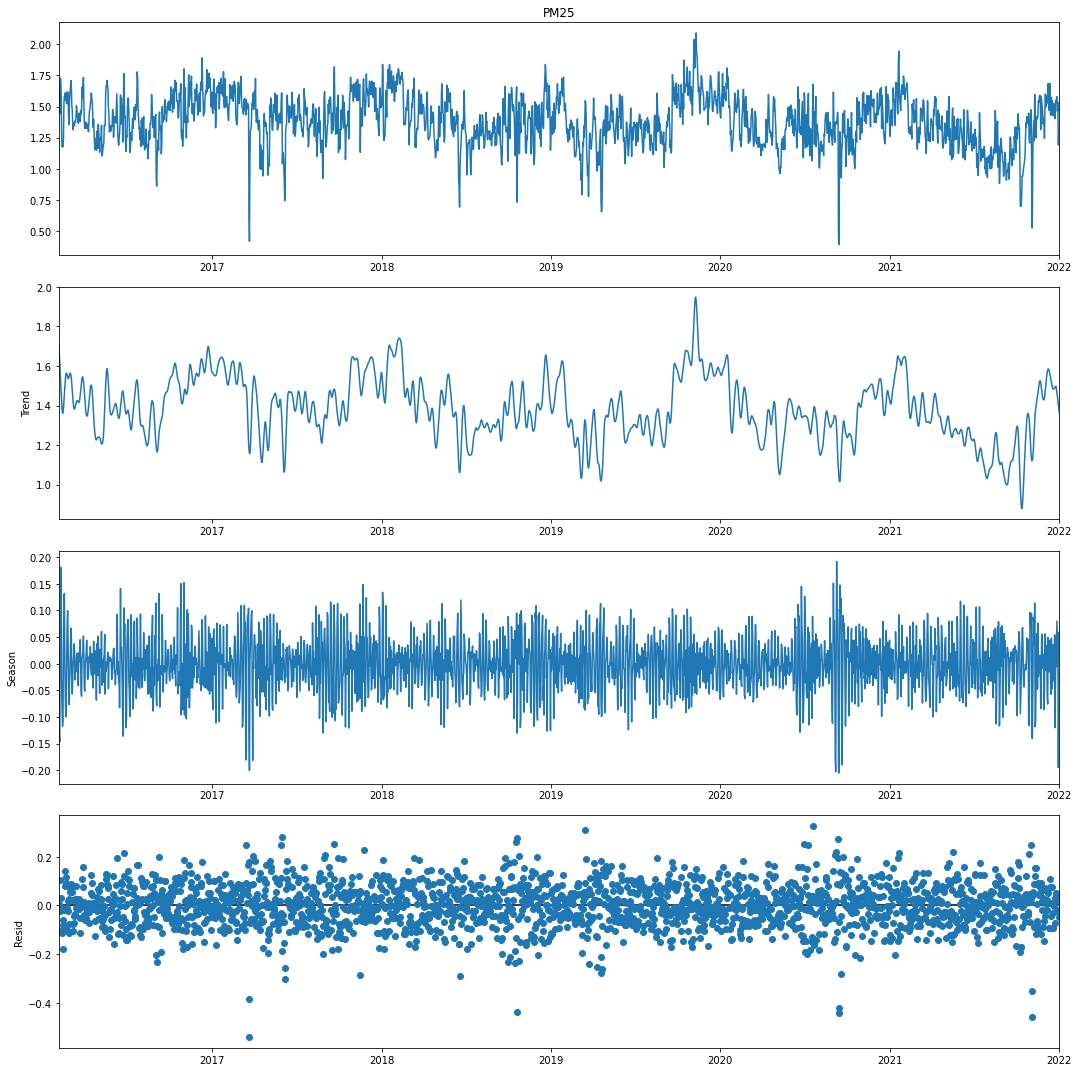

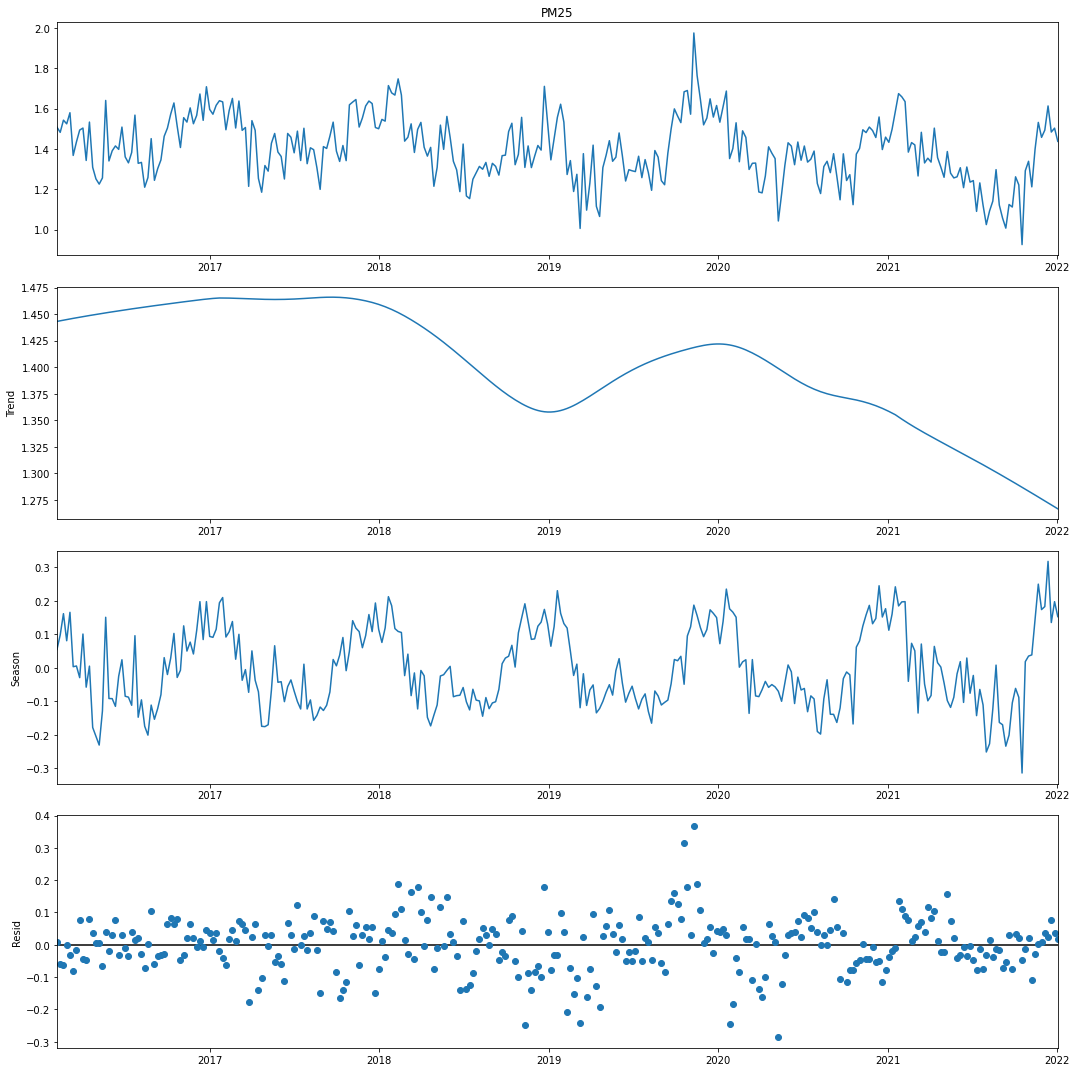

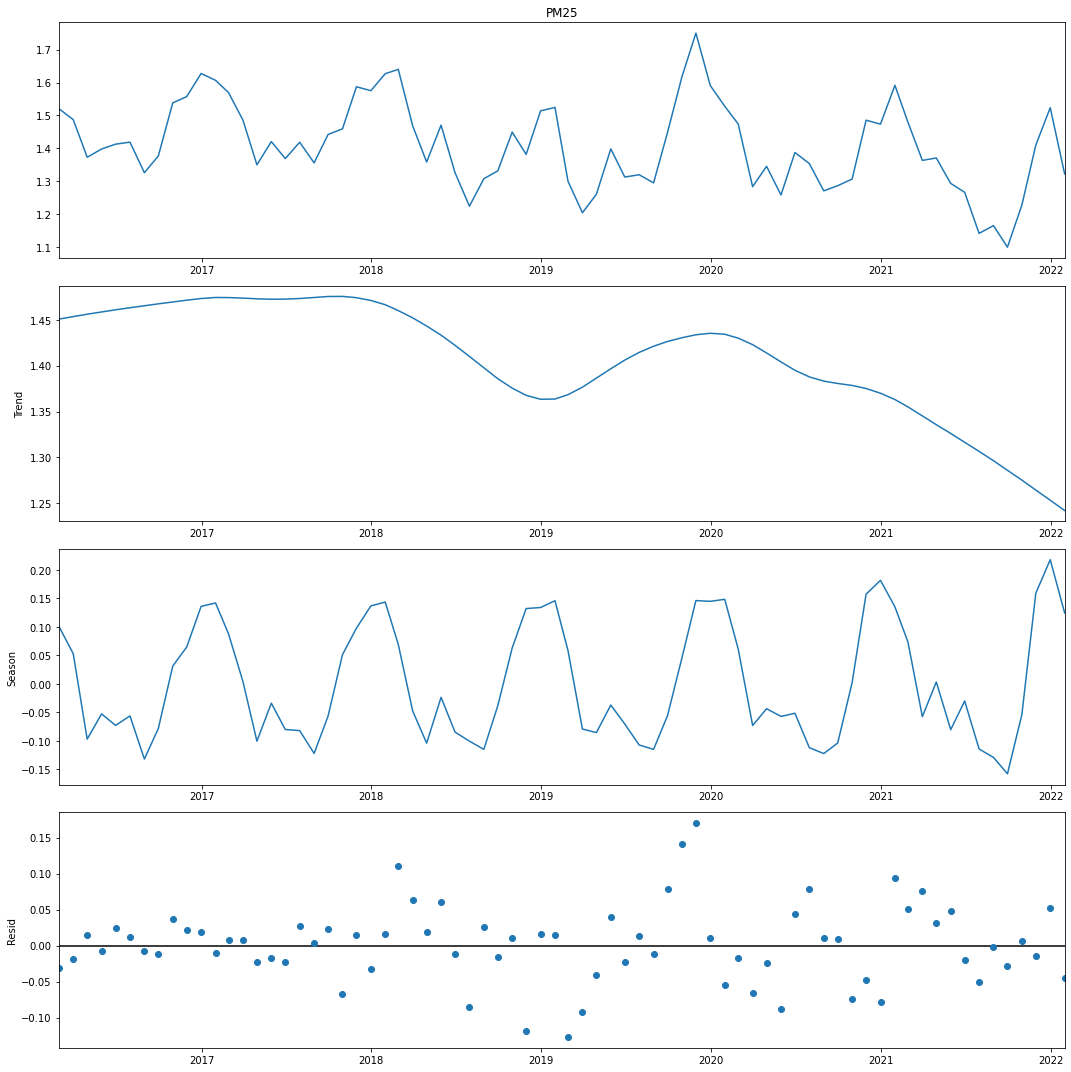

In [46]:
log10_data_plot(EDA_site.set_index('time'));
log10_data_plot(EDA_day);
log10_data_plot(EDA_week);
log10_data_plot(EDA_month);
log10_data_plot(EDA_year);

In [22]:
from tsfresh import extract_features
extracted_features = extract_features(EDA_site_2021, column_id="site_id", column_sort="time", n_jobs=4)
extracted_features

Feature Extraction: 100%|██████████| 1/1 [00:42<00:00, 42.57s/it]


PM25__variance_larger_than_standard_deviation  PM25__has_duplicate_max  \
49                                            1.0                      0.0   

    PM25__has_duplicate_min  PM25__has_duplicate  PM25__sum_values  \
49                      1.0                  1.0          188740.0   

    PM25__abs_energy  PM25__mean_abs_change  PM25__mean_change  \
49      5.981350e+06               5.674543           0.000114   

    PM25__mean_second_derivative_central  PM25__median  PM25__mean  \
49                              0.000114          18.0   21.543203   

    PM25__length  PM25__standard_deviation  PM25__variation_coefficient  \
49        8761.0                 14.785635                     0.686325   

    PM25__variance  PM25__skewness  PM25__kurtosis  PM25__root_mean_square  \
49      218.615014        2.046002         7.53854               26.128999   

    PM25__absolute_sum_of_changes  PM25__longest_strike_below_mean  \
49                        49709.0                            298.0   

    PM25__longest_strike_above_mean  PM25__count_above_mean  \
49                             88.0                  3400.0   

    PM25__count_below_mean  PM25__last_location_of_maximum  \
49                  5361.0                         0.05319   

    PM25__first_location_of_maximum  ...  PM25__count_above__t_0  \
49                         0.053076  ...                     1.0   

    PM25__count_below__t_0  PM25__lempel_ziv_complexity__bins_2  \
49                     0.0                             0.018377   

    PM25__lempel_ziv_complexity__bins_3  PM25__lempel_ziv_complexity__bins_5  \
49                             0.029106                             0.060495   

    PM25__lempel_ziv_complexity__bins_10  \
49                              0.127383   

    PM25__lempel_ziv_complexity__bins_100  PM25__fourier_entropy__bins_2  \
49                               0.327132                       0.163982   

    PM25__fourier_entropy__bins_3  PM25__fourier_entropy__bins_5  \
49                       0.217718                       0.420998   

    PM25__fourier_entropy__bins_10  PM25__fourier_entropy__bins_100  \
49                         0.68158                         2.221539   

    PM25__permutation_entropy__dimension_3__tau_1  \
49                                       1.747993   

    PM25__permutation_entropy__dimension_4__tau_1  \
49                                       3.065339   

    PM25__permutation_entropy__dimension_5__tau_1  \
49                                       4.563155   

    PM25__permutation_entropy__dimension_6__tau_1  \
49                                       6.173727   

    PM25__permutation_entropy__dimension_7__tau_1  \
49                                       7.659369   

    PM25__query_similarity_count__query_None__threshold_0.0  \
49                                                NaN         

    PM25__matrix_profile__feature_"min"__threshold_0.98  \
49                                           2.369075     

    PM25__matrix_profile__feature_"max"__threshold_0.98  \
49                                           13.89308     

    PM25__matrix_profile__feature_"mean"__threshold_0.98  \
49                                          10.840715      

    PM25__matrix_profile__feature_"median"__threshold_0.98  \
49                                           10.97712        

    PM25__matrix_profile__feature_"25"__threshold_0.98  \
49                                           9.977234    

    PM25__matrix_profile__feature_"75"__threshold_0.98  \
49                                          11.754336    

    PM25__mean_n_absolute_max__number_of_maxima_7  
49                                     137.571429  

[1 rows x 789 columns]

Text(0.5, 1.0, 'Concise Date Formatter')

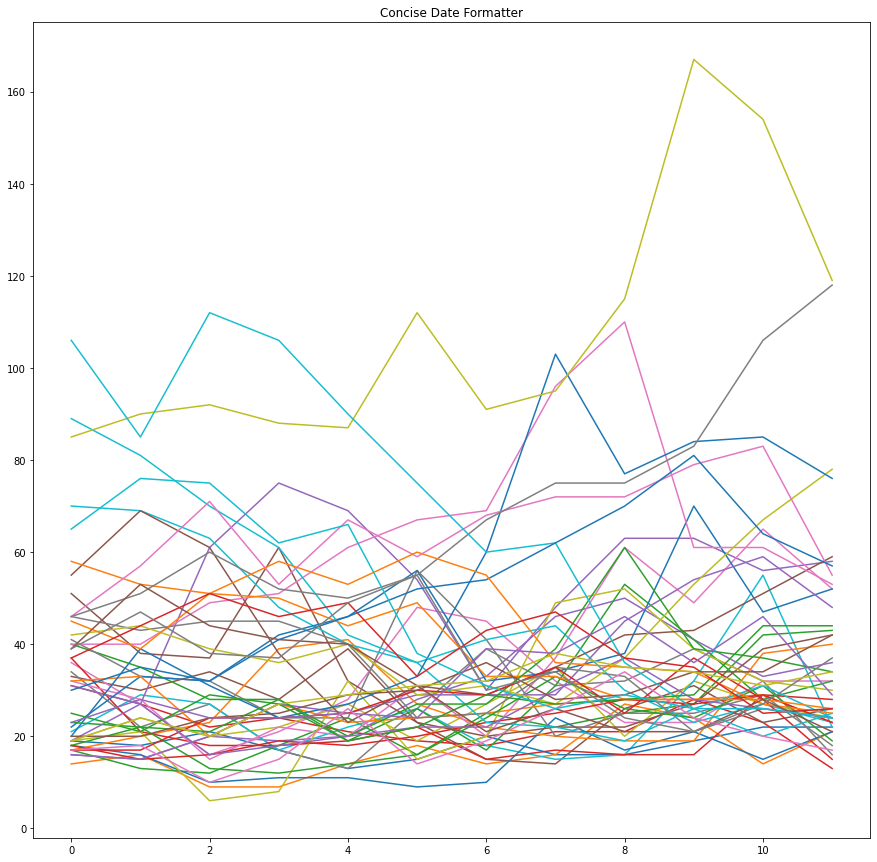

In [106]:
fig= plt.figure(figsize=(15,15))
ax = fig.gca()
ax.set_title('Concise Date Formatter')
last_index = 0
for date in range(0, 50):
    last_index = date*12
    tmp_series = EDA_site_2021.iloc[last_index:last_index+12]
    ax.plot(range(len(tmp_series['PM25'])),tmp_series['PM25'])


KeyError: 'week'

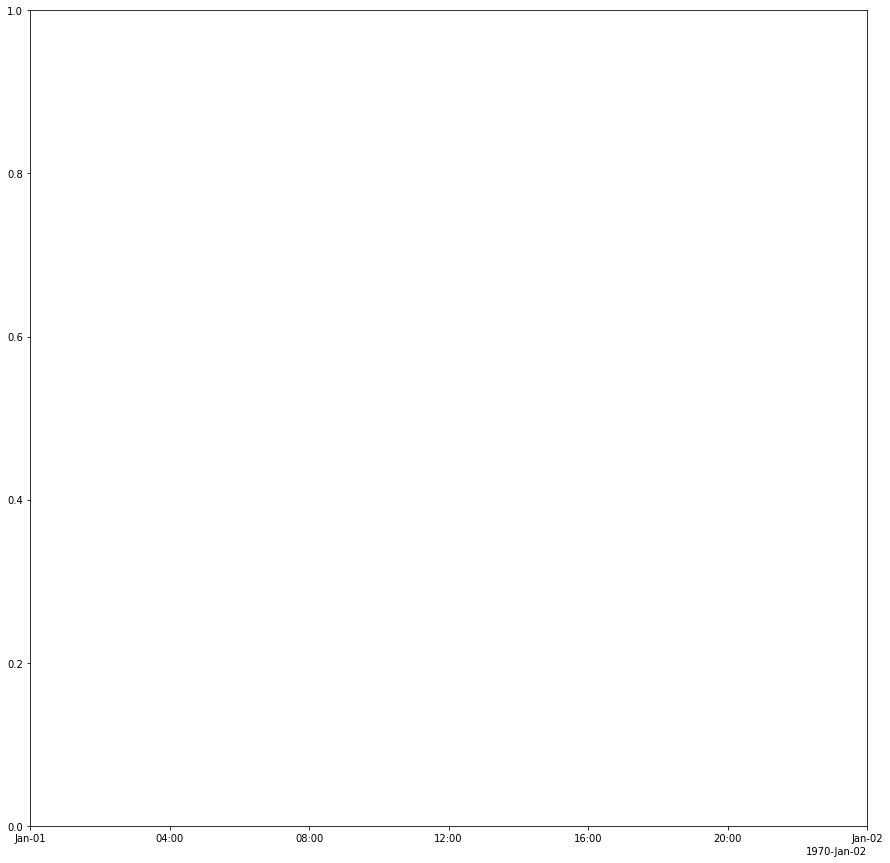

In [54]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
fig= plt.figure(figsize=(15,15))
ax = fig.gca()
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.plot(EDA_site['week'], EDA_site['PM25'])
ax.set_title('Concise Date Formatter')

plt.show()


# Analysis/Modeling
First: get the data and see if data is clean
Second: start EDA

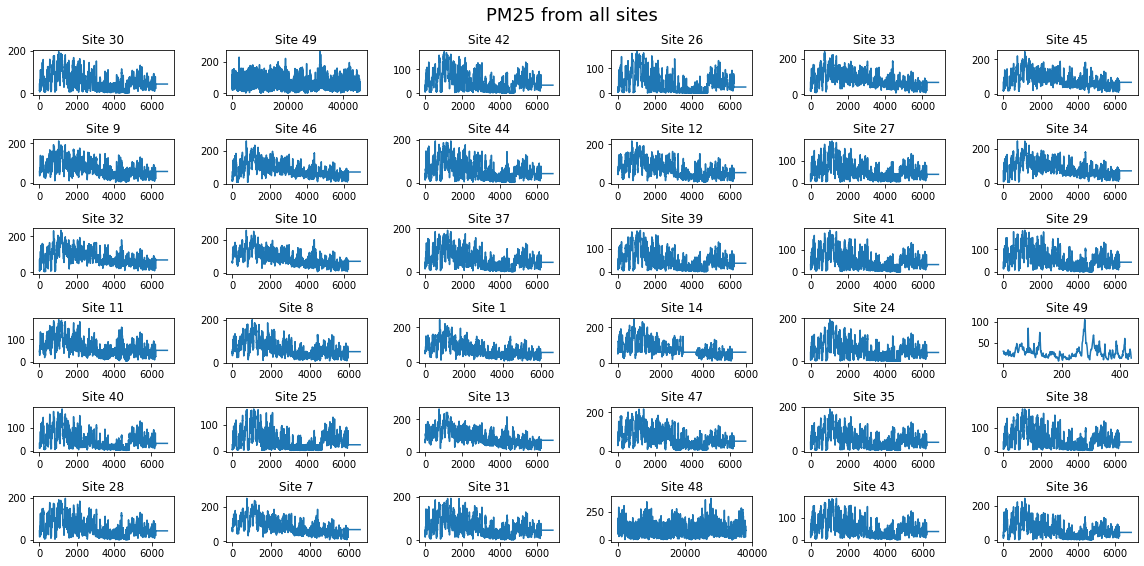

In [5]:
# Check if data is noisy by plotting everything
def plot_all_data(data_list, plot_col=None):
    """
    If col is None then doesn't have to extract data from list
    """
    fig = plt.figure(figsize=(16,9))
    # Calculate number of columns and row, setting axes and gridspec
    cols = round(np.sqrt(len(data_list)))
    gs = fig.add_gridspec(cols+1, cols)
    axes = []
    if plot_col is not None:
        for site in range(len(data_list)):
            y = site // cols
            x = site % cols
            axes.append(fig.add_subplot(gs[x,y]))
            axes[site].plot(data_list[site].loc[:, 'PM25'].values)
            axes[site].set_title("Site {}".format(data_list[site].index.get_level_values(0)[0]))
        fig.suptitle('PM25 from all sites', fontsize=18)
    if plot_col is None:
        for site in range(len(data_list)):
            y = site // cols
            x = site % cols
            axes.append(fig.add_subplot(gs[x,y]))
            axes[site].plot(data_list[site])
            # axes[site].set_title("Site {}".format(data_list[site].index.get_level_values(0)[0]))
        fig.suptitle('PM25 from all sites', fontsize=18)
    plt.tight_layout()
    plt.show()
    pass
plot_all_data(list_interim, plot_col='PM25')

We can see that not all data are in the same range, we should conform them to the same range.

## Denoising data

In [ ]:
# Data is pretty noisy so we must first denoise them
# Rolling window method should be a good start
# Now we will try rolling window method to denoise them
# Remember that denoising them but they can be transformed back.
# after denoising them we must plot the result.
# After plotting result we see which denoising is better and choose it

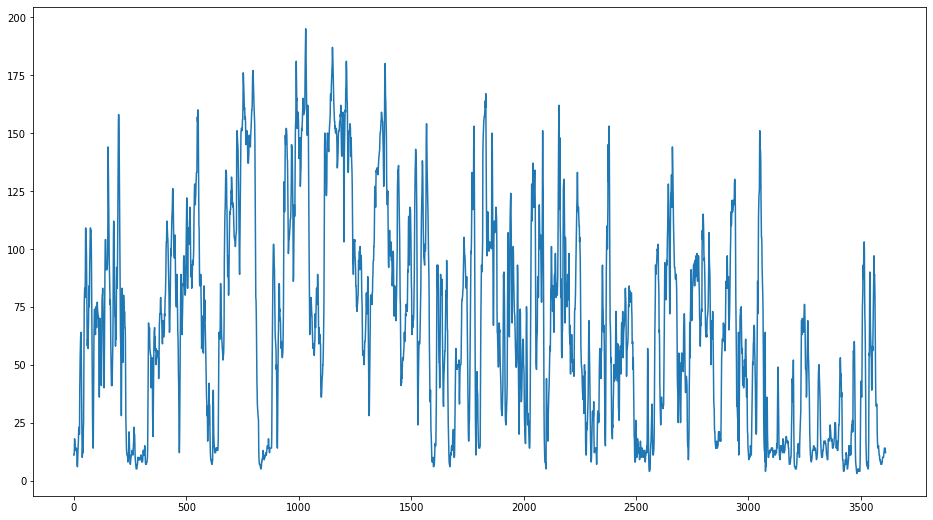

In [51]:
# this is the original data
fig = plt.figure(figsize=(16,9))
axes = fig.add_subplot()
axes.plot(list_interim[0].loc[:, 'PM25'].values)
plt.show()

Text(0.5, 1.0, 'Normal data')

Text(0.5, 1.0, 'triang method window 5')

Text(0.5, 1.0, 'hamming method window 5')

Text(0.5, 1.0, 'gaussian method window 5')

Text(0.5, 1.0, 'all instances in window is evenly weighted')

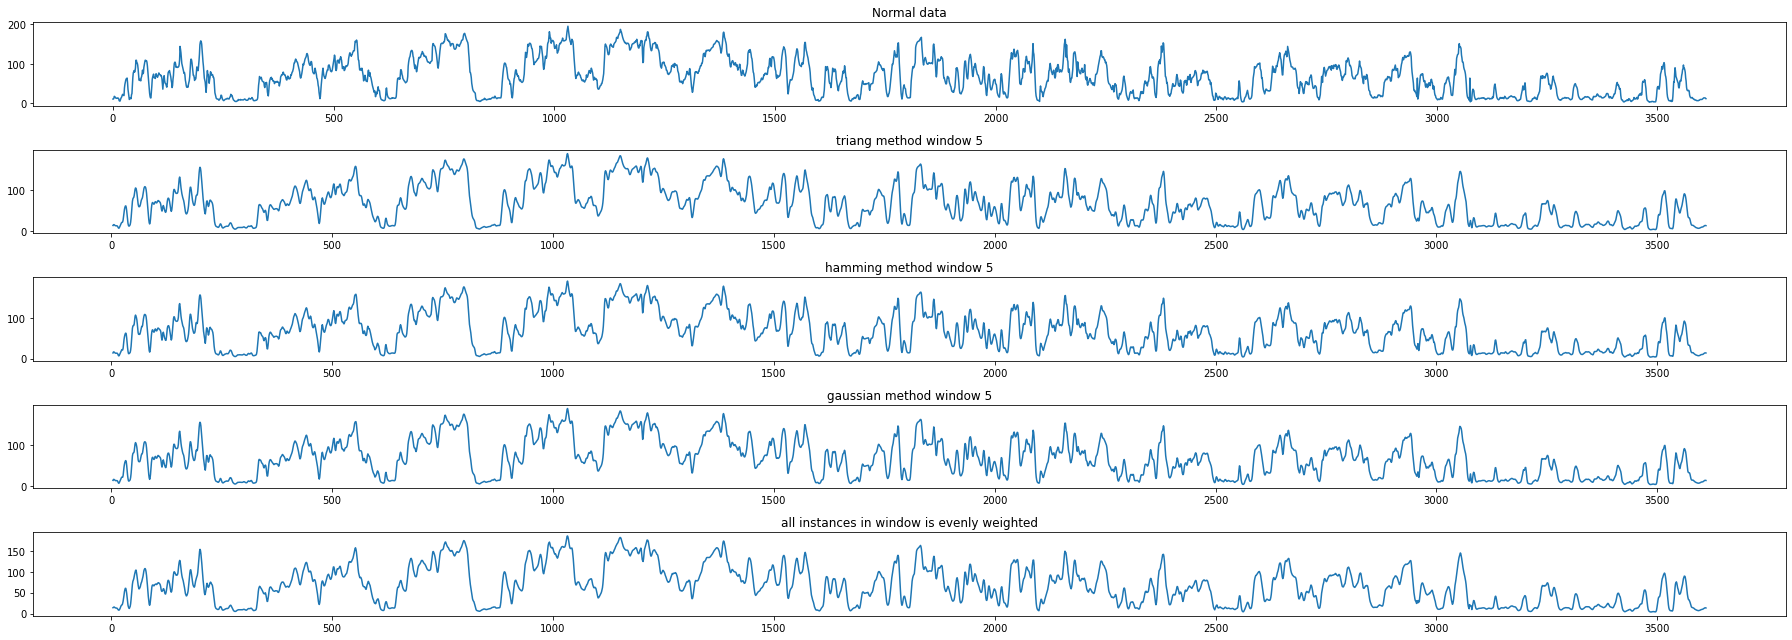

In [81]:
# Try denoising with rolling window of 5 for various window type. With rolling window of 5, there is not much difference between each type.
# But for rolling window of 24 we see some noticable different.
data = list_interim[0].loc[:, 'PM25']
rolling_methods = ['triang', 'hamming']
fig = plt.figure(figsize=(25,9))
gs = fig.add_gridspec(5,1)
axes = []
axes_index = 0
axes.append(fig.add_subplot(gs[0,0]))
axes[axes_index].plot(data.values)
axes[axes_index].set_title("Normal data")
axes_index += 1
for method in range(len(rolling_methods)):
    axes.append(fig.add_subplot(gs[axes_index,0]))
    axes[axes_index].plot(data.rolling(5, win_type=rolling_methods[method]).mean().values)
    axes[axes_index].set_title("{} method window 5".format(rolling_methods[method]))
    axes_index += 1

axes.append(fig.add_subplot(gs[axes_index,0]))
axes[axes_index].plot(data.rolling(5, win_type='gaussian').mean(std=1).values)
axes[axes_index].set_title("gaussian method window 5")
axes_index += 1

axes.append(fig.add_subplot(gs[axes_index,0]))
axes[axes_index].plot(data.rolling(5).mean().values)
axes[axes_index].set_title("all instances in window is evenly weighted")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Normal data')

Text(0.5, 1.0, 'triang method window 24')

Text(0.5, 1.0, 'hamming method window 24')

Text(0.5, 1.0, 'gaussian method window 24')

Text(0.5, 1.0, 'all instances in window is evenly weighted')

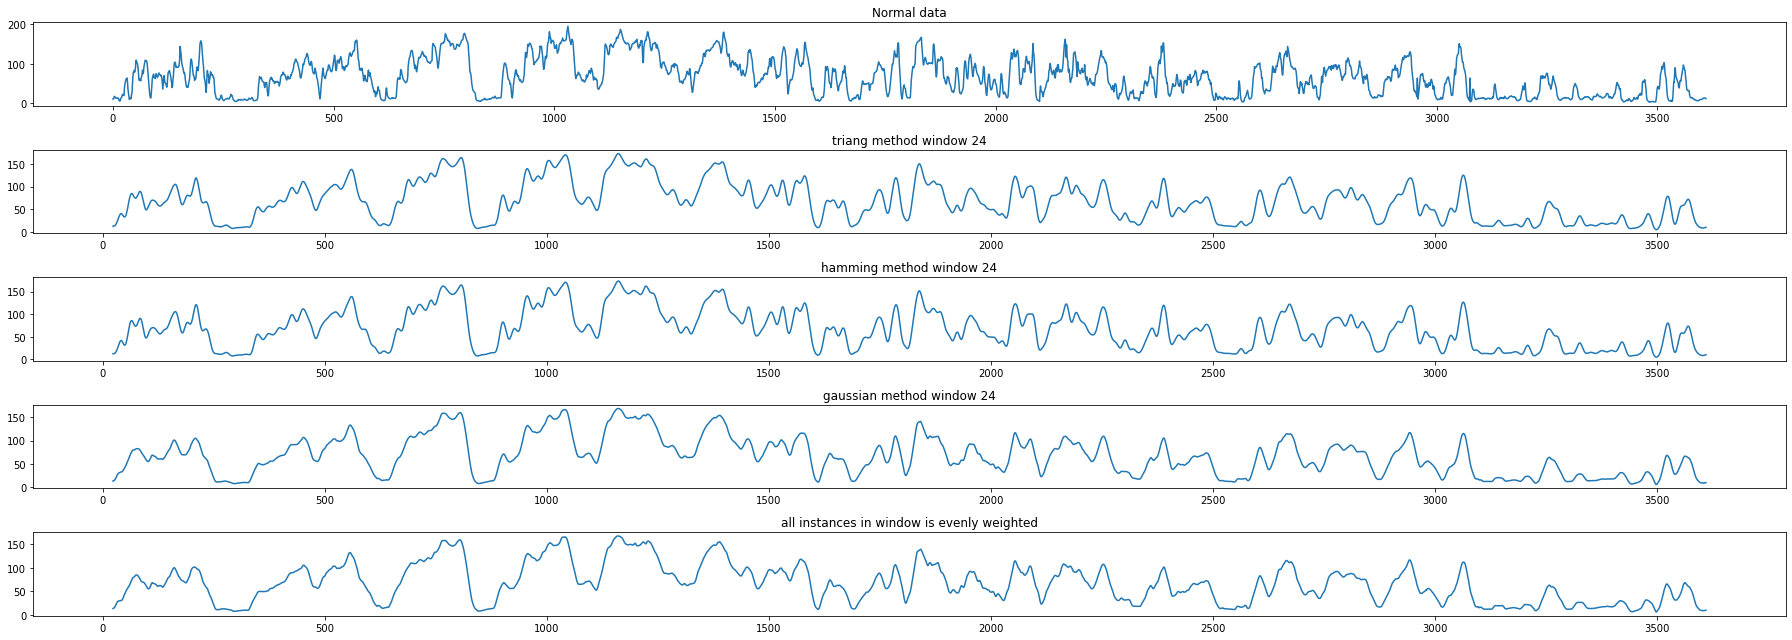

In [83]:
# But for rolling window of 24 we see some noticable different.
data = list_interim[0].loc[:, 'PM25']
rolling_methods = ['triang', 'hamming']
fig = plt.figure(figsize=(25,9))
gs = fig.add_gridspec(5,1)
axes = []
axes_index = 0
axes.append(fig.add_subplot(gs[0,0]))
axes[axes_index].plot(data.values)
axes[axes_index].set_title("Normal data")
axes_index += 1

for method in range(len(rolling_methods)):
    axes.append(fig.add_subplot(gs[axes_index,0]))
    axes[axes_index].plot(data.rolling(24, win_type=rolling_methods[method]).mean().values)
    axes[axes_index].set_title("{} method window 24".format(rolling_methods[method]))
    axes_index += 1

axes.append(fig.add_subplot(gs[axes_index,0]))
axes[axes_index].plot(data.rolling(24, win_type='gaussian').mean(std=12).values)
axes[axes_index].set_title("gaussian method window 24")
axes_index += 1

axes.append(fig.add_subplot(gs[axes_index,0]))
axes[axes_index].plot(data.rolling(24).mean().values)
axes[axes_index].set_title("all instances in window is evenly weighted")

plt.tight_layout()
plt.show()

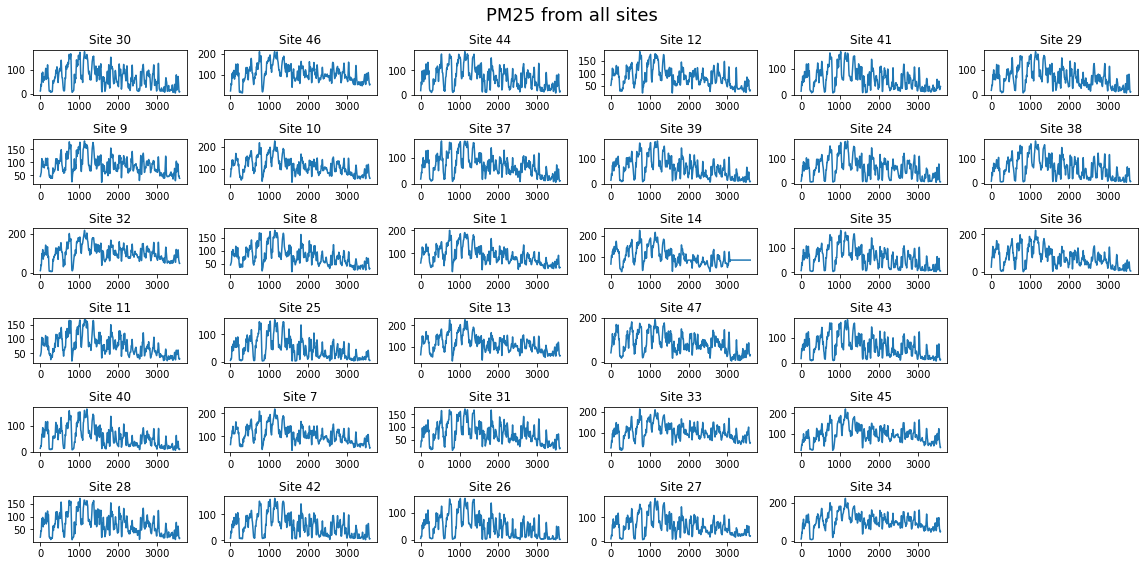

In [93]:
# Change all PM25 data with triang method denoising and window size is 24
denoised_data = []
for i in range(len(list_interim)):
    data = list_interim[i].loc[:, ['PM25']]
    denoised_data.append(data.rolling(24, win_type='triang').mean().dropna())
plot_all_data(denoised_data, plot_col='PM25')

## Plot data and get critical features

In [ ]:
# Let's see what features we need?
# Is there any trends for AQI in a day, week, month, quarter, years?
# To see trends in a day, we must plot each hour average AQI for every day in a month for 12 months.
# To see trends in a week, we must plot AQI of week after downcasting from hour to day. Plot them for 3 months
# To see trends in a month, we must plot AQI of 12 months. Now we do not have it yet.
# Year and quarter is also where we doesn't have enough data yet.
# How much difference are there in these trends? Put them in percentage.
# Are there any trends for different stations?
# Use time series clustering to cluster stations after denoising.
# Just to be sure, plot the amount of each AQI category for each stations in a month time for 3 months. After that we can be sure that each station is differetn.
# How much difference are there in stations? Put them in percentage

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 1')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 2')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 3')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 4')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 5')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 12')

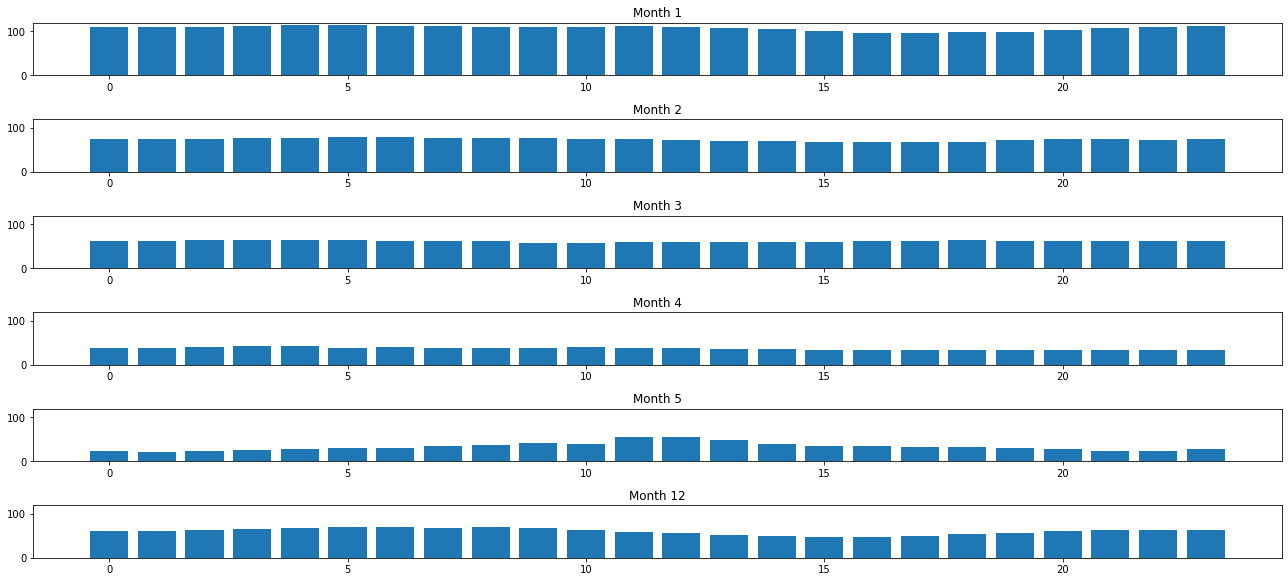

In [134]:
# to see trends in a day
# first: get hourly average of everyday in a month. groupby hour and mean
# second: do that for every months
# third: do that for every sites
sample_data = list_interim[0].loc[:, ['PM25']]

sample_data['month'] = sample_data.index.get_level_values(1).month
sample_data['hour'] = sample_data.index.get_level_values(1).hour
groupby_data = sample_data.groupby(['month', 'hour'])['PM25'].mean()
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(12, 1)
axes = []
axes_index = 0
for month in groupby_data.index.get_level_values(0).unique():
    plot_data = groupby_data[groupby_data.index.get_level_values(0)==month].reset_index()

    # plotting parameter
    if axes_index != 0:
        axes.append(fig.add_subplot(gs[axes_index, 0], sharey=axes[0]))
    else:
        axes.append(fig.add_subplot(gs[axes_index, 0]))
    axes[axes_index].bar(x=plot_data.loc[:, 'hour'].values, height=plot_data.loc[:, 'PM25'].values)
    axes[axes_index].set_title("Month {}".format(month))
    axes_index += 1
plt.tight_layout()
plt.show()

We can see that 

In [117]:
len(groupby_data[groupby_data.index.get_level_values(0)==1].reset_index().loc[:, 'PM25'].values)

24

In [116]:
len(groupby_data[groupby_data.index.get_level_values(0)==1].reset_index().loc[:, 'hour'].values)

24

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here